-   Cделать не менее 5 визуализаций
    разного типа с фильтрацией и преобразованием данных разной сложности

-   Составить список вопросов, по которым хотелось бы получить ответ в
    виде графиков (и расширять этот список вопросов в процессе
    выполнения задания)
-   Построить соответствующие визуализации

# Описание

Целью данной подзадачи является исследование выборки фильмов полученных с портала IMDB.

Выборка состоит из фильмов выпущенных в 1945 году.

## Импорт библиотек

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Подготовка данных

In [2]:
titles = pd.read_csv('data/imdb.csv')

display(titles.head())

titles['count'] = 1

titles = titles[titles['year'].isna() == False]
titles['year'] = titles['year'].str[:4]
titles = titles[titles['year'].str.match('[1-90][1-90][1-90][1-90]')]
titles['year'] = titles['year'].astype(int)

titles['genres'] = titles['genre']
titles['genre'] = titles['genres'].str.split(', ').str.get(0)

titles['runtime'] = titles['runtime'].str.split(' ').str.get(0)
titles['runtime'] = titles['runtime'].astype(float)

titles['votes'] = titles['votes'].fillna(-1)
titles['votes'] = titles['votes'].astype(int, errors='ignore')

sns.pairplot(titles[['runtime', 'rating', 'votes', 'year']], size=2)

Unnamed: 0                                      title  year  \
0           0                              Замок дьявола  1896   
1           1  Прибытие поезда на вокзал города Ла-Сьота  1896   
2           2                      Сцена в саду Роундхэй  1888   
3           3                                 Карменсита  1894   
4           4                             Транзит Венеры  1874   

                link  rating   votes                       genre runtime  
0  /title/tt0000091/     6.7  2359.0               Short, Horror   3 min  
1  /title/tt0000012/     7.4  9077.0  Documentary, Short, Action   1 min  
2  /title/tt0392728/     7.5  4872.0          Documentary, Short   1 min  
3  /title/tt0000001/     5.8  1507.0          Documentary, Short   1 min  
4  /title/tt3155794/     7.0   929.0          Documentary, Short   1 min

/home/alexander/.virtualenvs/otus-ds/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/alexander/.virtualenvs/otus-ds/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/alexander/.virtualenvs/otus-ds/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Как изменяется средняя длина названия фильма с течением времени?

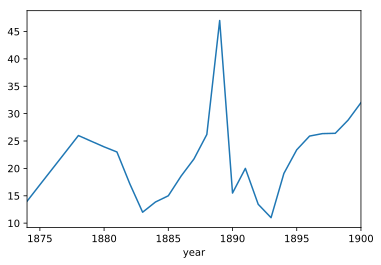

In [3]:
names = titles.copy()
names['length'] = names['title'].str.len()
year = names['year']
names.groupby('year').mean()['length'].reindex(range(year.min(), year.max()+1)).interpolate(method='spline', order=1).plot()

Какой долю каждый жанр занимает в общем зачете, учитывая, что фильм может принадлежать нескольким жанрам? 

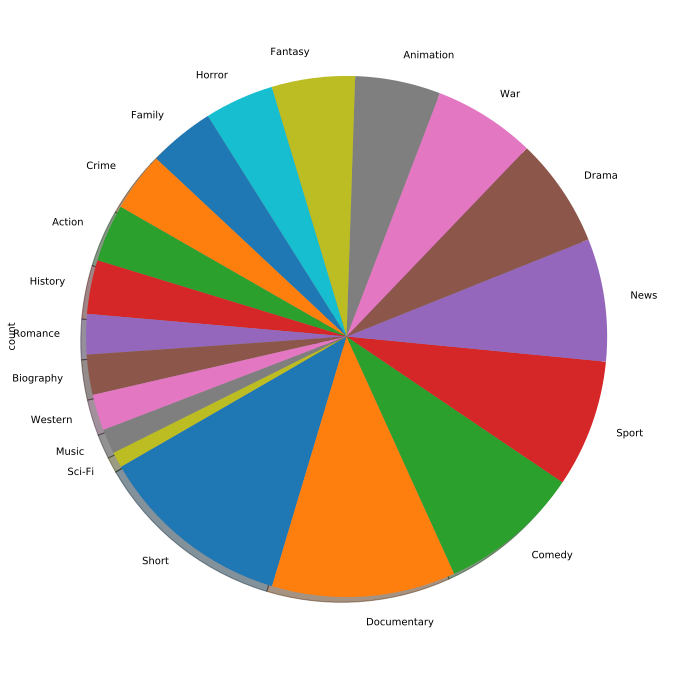

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))

genres = pd.DataFrame({'name': titles['genres'].str.split(', ').apply(pd.Series).stack().reset_index(drop=True)})
genres['count'] = 1
genres_by_name = genres.groupby('name').sum().sort_values(by='count',ascending=False)
genres_by_name['count'].map(lambda val: math.log2(val)).plot.pie(ax=ax, shadow=True, startangle=210)

Каким образом зависит средняя продолжительность фильма от его жанра?

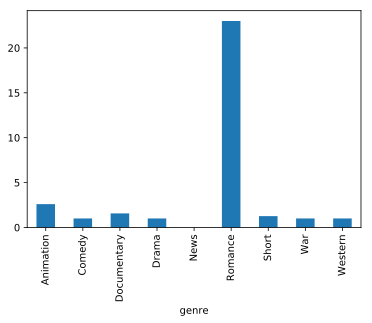

In [5]:
runtimes = titles.copy()
runtimes.groupby('genre').mean()['runtime'].plot.bar()

Какой вид имеет распределение по рейтингу за различные временные периоды?

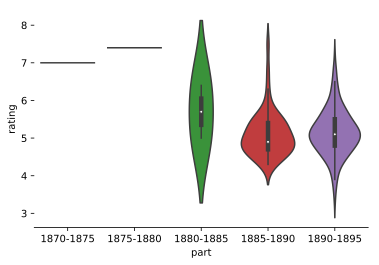

In [6]:
ratings = titles.copy()

ratings = ratings[ratings['rating'].notna()]

borders = np.arange(1870, 1899, 5)
parts = []
for start, end in zip(borders[:-1], borders[1:]):
    part = '{}-{}'.format(start, end)
    parts.append(part)
    ratings.loc[titles.year.between(start, end), 'part'] = part

sns.violinplot(x='part', y='rating', order=parts, data=ratings)
sns.despine(left=True)

Как зависит количество проголовавших от года выхода и продолжтельности фильма?

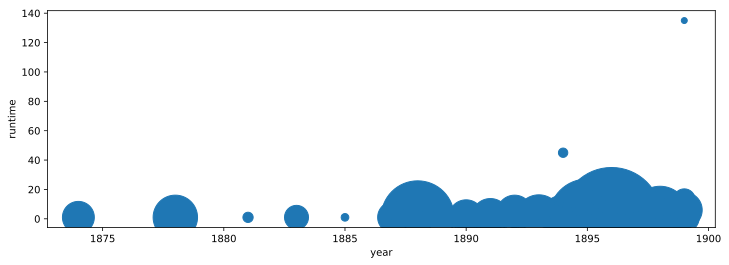

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12,4))

votes = titles.dropna()
factor = 10000 *  1 / votes['votes'].max()
votes.plot.scatter('year', 'runtime', s=votes['votes'].mul(factor), ax=ax)